### Assignment 2

In [6]:
#hash functions

#these hash functions will return index values
#that we will use to mark in our bloom filter
#and they each use different bitwise operators (and, or, not)
#to generate numbers that give us the index values

def hash1(string, m):
    #and bit function
    bit_val = None
    for c in string:
        bit = int(bin(ord(c))[2:])
        if bit_val == None:
            bit_val = bit
        else:
            bit_val = bit_val & bit
    return bit_val%m

def hash2(string, m):
    #or bit function
    bit_val = None
    for c in string:
        bit = int(bin(ord(c))[2:])
        if bit_val == None:
            bit_val = bit
        else:
            bit_val = bit_val | bit
    return bit_val%m

def hash3(string, m):
    #not bit function
    bit_val = None
    for c in string:
        bit = int(bin(ord(c))[2:])
        if bit_val == None:
            bit_val = bit
        else:
            bit_val = ~bit
    return bit_val%m

print(hash1('mouse', 29), hash2('mouse', 29), hash3('mouse', 29))

21 18 13


In [51]:
#creates and populates bloom filter
import math
from bitarray import bitarray

def bloomfilter(array):
    n = len(array)
    m = 3*n/math.log(2)
    m = math.ceil(m)
    #I chose to make the array larger than the calculated value
    #rather than lower because the larger array should keep
    #the false positive rate lower
    bt = bitarray(m)
    bt.setall(0)
    for s in array:
        bt[hash1(s, m)] = 1
        bt[hash2(s, m)] = 1
        bt[hash3(s, m)] = 1
    bf = []
    for c in bt:
        if c == False:
            c = 0
            bf.append(c)
        if c == True:
            c = 1
            bf.append(c)

    return bf

bloomfilter(['cat', 'elephant', 'mouse', 'oval', 'seventy seven', 'why'])

[0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1]

In [52]:
#false positive probability

import math

def falseprob(bf):
    m = len(bf)
    n = -m/(math.log2(.1)/math.log(2))
    k = 3
    p = (1 - math.exp(-k*n/m))**k
    return p

def falseprob2(arr):
    n = len(arr)
    m = len(bloomfilter(arr))
    p = (1 - math.exp(-3*n/m))**3
    return p

In [59]:
#search if an element exists in our bloomfilter

def searchbloom(arr, element):
    bf = bloomfilter(arr)
    m = len(bf)
    test = [bf[hash1(element, m)], bf[hash2(element, m)], bf[hash3(element, m)]]
    for i in test:
        if i == 0:
            #print(element, "is not in the set")
            return False
    #print(element, "might be in the set.")
    return True


array = ['cat', 'elephant', 'mouse', 'oval', 'seventy seven', 'why', 'kepler']
print(bloomfilter(array))
searchbloom(array, "mouse")

[0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0]


True

In [60]:
#testing false positives

def searchfunc(array, elm):
    for i in array:
        if i == elm:
            return True



array = ['cat', 'elephant', 'mouse', 'oval', 'seventy seven', 'why']
searchfunc(array, "mouse")

def searchdata(bfarr, sarr):
    actuals = 0
    maybes = 0
    false = 0
    for item in sarr:
        r = searchbloom(bfarr, item)
        if r == True:
            maybes += 1
            k = searchfunc(bfarr, item)
            if k == True:
                actuals += 1
            else:
                false += 1
    return false/(maybes + 1)


array2 = ['cat', 'elephant', 'mouse', 'oval', 'seventy seven', 'why', 'kepler', 'nice', 'twelvety', 'a', 'gee', 'infinte', 'questions', '123', '$%^*', 'beeowzaa']
searchdata(array, array2)

0.4166666666666667

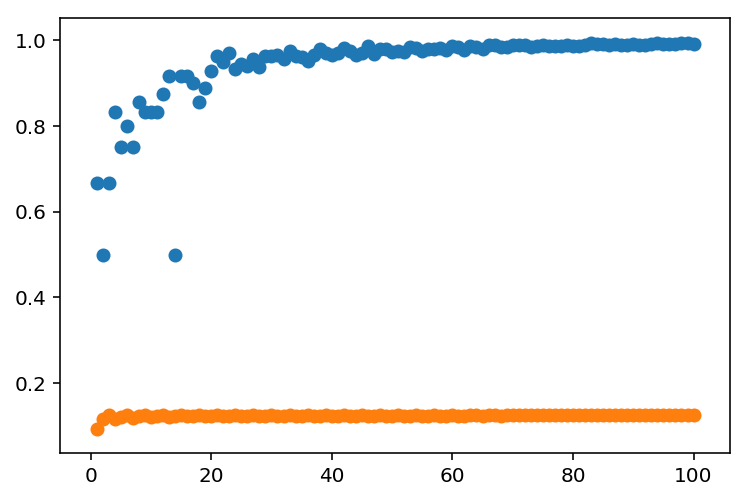

In [63]:
import string
import random
from matplotlib import pyplot as plt

def genarrays(n):
    char = string.printable
    arr = []
    arrays = []
    for i in char:
        arr.append(i)
    for j in range(n):
        x = random.sample(arr, 6)
        sx = ''
        for y in x:
            sx = sx + str(y)
        arrays.append(sx)
    return arrays

def idk(n):
    fpd = []
    fpp = []
    for i in range(1, n+1):
        g = genarrays(i)
        s = genarrays(2*i)
        fpd.append(searchdata(g, s))
        fpp.append(falseprob2(g))
    q = []
    for p in range(1, n+1):
        q.append(p)
    plot1 = plt.scatter(q, fpd)
    plot2 = plt.scatter(q, fpp)
    plt.show()

idk(100)